In [485]:
import pandas as pd
import numpy as np

In [486]:
path = '/Users/francobenko/Documents/DataSets/Implementacion RegLin/income.data.csv'

In [489]:
class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    def split(self, percentage):
        train_data = np.random.permutation(self.dataset)[:int(self.dataset.shape[0]*percentage),:self.dataset.shape[1]]
        test_data = np.random.permutation(self.dataset[~(np.isin(self.dataset,train_data).sum(axis=1)==3),:])[:int(self.dataset.shape[0]*(1-percentage)),:self.dataset.shape[1]]
        return train_data, test_data


    def _build_dataset(self, path):
        data = np.genfromtxt(path, dtype=None, names=True, delimiter=',', encoding=None)
        return data.reshape(data.shape[0],1)

In [490]:
data = Data(path)
train_data, test_data = data.split(0.8)

In [493]:
train_data[:5,:]

array([[('"176"', 2.27452311, 2.31155424)],
       [('"46"', 5.35871566, 3.75265949)],
       [('"275"', 4.99054854, 3.45177254)],
       [('"143"', 4.29198369, 3.16938024)],
       [('"311"', 1.54463433, 1.6446366 )]],
      dtype=[('f0', '<U5'), ('income', '<f8'), ('happiness', '<f8')])

In [469]:
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        constante = np.mean(Y)
        self.model = constante


    def predict(self, X):
        y_hat = self.model
        return y_hat


class LinearRegression(BaseModel):

    def fit(self, X, Y):
        W = np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,Y))
        self.model = W
        print('Calculo W = {}'.format(W))

    def predict(self, X):
        y_hat = self.model.T*X
        return y_hat

class LinearRegressionB(BaseModel):

    def fit(self, X, Y):
        X_ = np.ones((X.shape[0],X.shape[1]+1))
        X_[:,:-1] = X
        W = np.matmul(np.linalg.inv(np.matmul(X_.T,X_)),np.matmul(X_.T,Y))
        self.model = W
        print('Calculo W= {}'.format(W))

    def predict(self, X):
        y_hat = self.model[0]*X+self.model[1]
        return y_hat
    
    
class PolinomialRegression(BaseModel):
    
    def __init__(self):
        self.n = 1
    
    def fit(self, n, X, Y):
        
        self.n = n
        
        X_ = np.ones((X.shape[0],X.shape[1]*self.n+1))

        ini = 1

        for i in range(1,self.n+1):
            fin = X.shape[1]*i+1
            X_[:,ini:fin] = X**i
            ini = fin
           
        W = np.matmul(np.linalg.inv(np.matmul(X_.T,X_)),np.matmul(X_.T,Y))
        self.model = W
        #print('Calculo W= {}'.format(W))

    def predict(self, X):
        
        X_ = np.ones((X.shape[0],X.shape[1]*self.n+1))

        ini = 1

        for i in range(1,self.n+1):
            fin = X.shape[1]*i+1
            X_[:,ini:fin] = X**i
            ini = fin
            
        y_hat = np.sum(X_.T*self.model, axis=0)
        return y_hat
    

In [136]:
class Metric(object):
    
    def MSE(self, Y, y_hat):
        mean_sq_err = np.mean(np.sqrt((Y-y_hat)**2))
        return mean_sq_err
    

**Gradiente decendiente**

In [504]:
def Gradient_decent(x_train, y_train, lr=0.01, n_epochs=100):
    
    f = x_train.shape[0]
    c = x_train.shape[1]
    
    w = np.random.randn(c).reshape(c,1)
    

    for epoch in range(0,n_epochs):
        grad = (y_train - x_train * w)
        grad_sum = np.sum(grad* x_train, axis = 0)
        grad_mul =  -2/f * grad_sum
        gradient = np.transpose(grad_mul)
        w = w - (lr * gradient)

    return w

In [505]:
Gradient_decent(train_data['income'].reshape(398,1),train_data['happiness'].reshape(398,1))

array([[0.74996216]])

**Gradiente decendiente estocastico**

In [3]:
def Stockastic_gradient_decent(x_train, y_train, lr=0.01, n_epochs=100):
    
    f = x_train.shape[0]
    c = x_train.shape[1]
    
    w = np.random.randn(c).reshape(c,1)

    for epoch in range(0,n_epochs):
        idx = np.random.permutation(x_train.shape[0])
        x_train = x_train[idx]
        y_train = y_train[idx]
        
        for n in range(0,f):
            grad = (y_train[n] - x_train[n] @ w) * x_train[n]
            grad_mul =  -2/f * grad
            gradient = np.transpose(grad_mul)
            w = w - (lr * gradient)

    return w

In [496]:
Stockastic_gradient_decent(train_data['income'].reshape(398,1),train_data['happiness'].reshape(398,1))

array([[0.74981594]])

**Gradiente decendiente mini-batch**

In [15]:
def MBatch_gradient_decent(x_train, y_train, lr=0.01, n_epochs=100, b=10):
    
    f = x_train.shape[0]
    c = x_train.shape[1]
    
    w = np.random.randn(c).reshape(c,1)

    for epoch in range(0,n_epochs):
        idx = np.random.permutation(x_train.shape[0])
        x_train = x_train[idx]
        y_train = y_train[idx]
        
        batch_size = int(f/b)
        
        for n in range(0,f, batch_size):
            end = n + batch_size if n + batch_size <= f else f
            batch_x = x_train[n:end]
            batch_y = y_train[n:end]
            
            grad = (batch_y - batch_x @ w) * batch_x
            grad_sum = np.sum(grad, axis = 0)
            grad_mul =  -2/f * grad_sum
            gradient = np.transpose(grad_mul)
            w = w - (lr * gradient)

    return w

In [497]:
MBatch_gradient_decent(train_data['income'].reshape(398,1),train_data['happiness'].reshape(398,1))

array([[0.74889466]])

# Ejercicio Integrador

### Generating the dataset

In [445]:
X = np.linspace(np.pi,-np.pi,1000)
Y = np.sin(X).reshape(1000,) + np.random.normal(0,.1,(1000,))

In [447]:
dataset = np.empty((1000,2))
dataset[:,0] = X
dataset[:,1] = Y

### Plotting the data

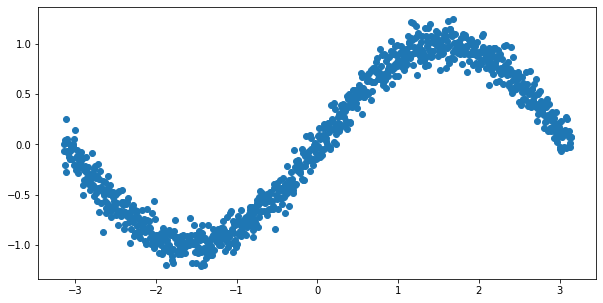

In [448]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
plt.scatter(X,Y)

### Split the dataset

In [449]:
data = Data(path)
data.dataset = dataset
dataset_train, dataset_test, dataset_valid = data.split()

### Creating and fitting the models

In [450]:
lrb = LinearRegressionB()
lrb.fit(dataset_train[:,0].reshape(700,1),dataset_train[:,1].reshape(700,1))

y_hat_lrb = lrb.predict(dataset_test[:,0].reshape(200,1))

Calculo W= [[0.31075919]
 [0.01357504]]


In [451]:
y_hat_lrb.shape

(200, 1)

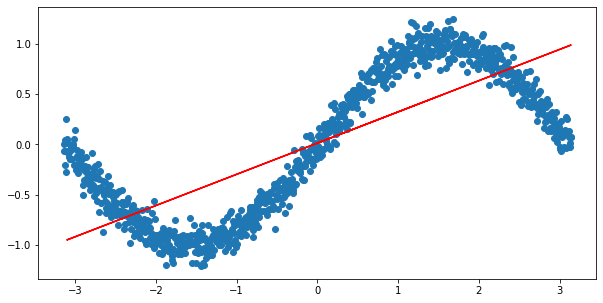

In [452]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X,Y)
plt.plot(dataset_test[:,0].reshape(200,1),y_hat_lrb, 'r')

In [453]:
poly_2 = PolinomialRegression()
poly_2.fit(2,dataset_train[:,0].reshape(700,1),dataset_train[:,1].reshape(700,1))

y_hat_poly_2 = poly_2.predict(dataset_test[:,0].reshape(200,1))

Calculo W= [[-0.01347778]
 [ 0.31152333]
 [ 0.00843749]]


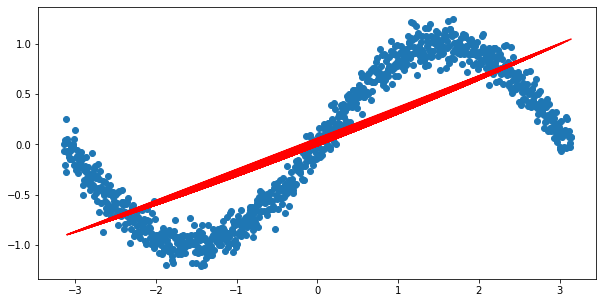

In [454]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X,Y)
plt.plot(dataset_test[:,0].reshape(200,1),y_hat_poly_2,'r')

In [455]:
poly_3 = PolinomialRegression()
poly_3.fit(3,dataset_train[:,0].reshape(700,1),dataset_train[:,1].reshape(700,1))

y_hat_poly_3 = poly_3.predict(dataset_test[:,0].reshape(200,1))

Calculo W= [[ 1.35447267e-03]
 [ 8.60906181e-01]
 [ 1.78413059e-04]
 [-9.38332757e-02]]


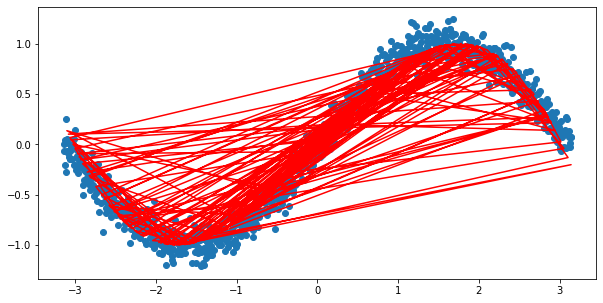

In [456]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X,Y)
plt.plot(dataset_test[:,0].reshape(200,1),y_hat_poly_3,'r')

Calculo W= [[-5.13848833e-03]
 [ 9.88079386e-01]
 [ 5.53676900e-03]
 [-1.54686974e-01]
 [-5.40879467e-04]
 [ 5.57911177e-03]]


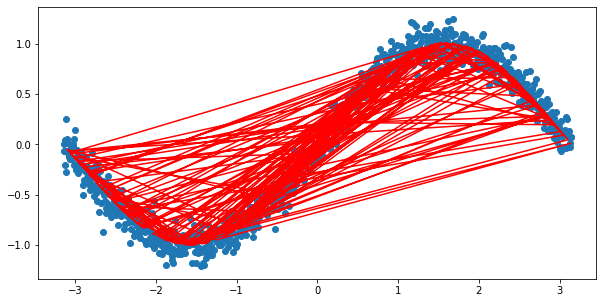

In [460]:
poly_5 = PolinomialRegression()
poly_5.fit(5,dataset_train[:,0].reshape(700,1),dataset_train[:,1].reshape(700,1))

y_hat_poly_5 = poly_5.predict(dataset_test[:,0].reshape(200,1))

fig = plt.figure(figsize=(10,5))
plt.scatter(X,Y)
plt.plot(dataset_test[:,0].reshape(200,1),y_hat_poly_5,'r')
plt.show()

Calculo W= [[-6.06412761e-03]
 [ 1.00292872e+00]
 [ 7.46649089e-03]
 [-1.68253387e-01]
 [-1.28497228e-03]
 [ 8.59396114e-03]
 [ 9.88550321e-05]
 [-1.88407642e-04]
 [-4.32283279e-06]]


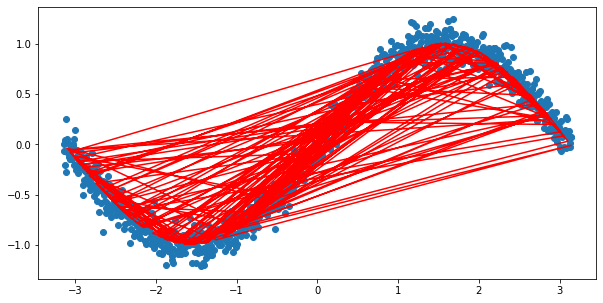

In [458]:
poly_8 = PolinomialRegression()
poly_8.fit(8,dataset_train[:,0].reshape(700,1),dataset_train[:,1].reshape(700,1))

y_hat_poly_8 = poly_8.predict(dataset_test[:,0].reshape(200,1))

fig = plt.figure(figsize=(10,5))
plt.scatter(X,Y)
plt.plot(dataset_test[:,0].reshape(200,1),y_hat_poly_8,'r')

### Create K-folds and get the MSE of the k models

In [472]:
def k_folds(k, model_objet, model_degree, X, Y):
    len_fold = X.shape[0]//k
    X_folds = np.array([])
    Y_folds = np.array([])
    X_validation = np.array([])
    Y_validation = np.array([])
    metric = Metric()
    models_folds = np.array([])
    mse_folds = np.array([])
    
    for i in range(k):
        X_folds = np.append(X_folds, X[len_fold*k*i:len_fold*k*(i+1),:])
        Y_folds = np.append(Y_folds, Y[len_fold*k*i:len_fold*k*(i+1),:])
    
    
    X_folds = X_folds.reshape(k,len_fold,X.shape[1])
    Y_folds = Y_folds.reshape(k,len_fold,Y.shape[1])
    #print(X_folds.shape)
    pos = np.array(range(k))
    
    for i in range(k):
        X_train = X_folds[0]
        Y_train = Y_folds[0]
        for j in range(1,k-2):
            X_train = np.append(X_train,X_folds[j],axis=0)
            Y_train = np.append(Y_train,Y_folds[j],axis=0)
        X_test = X_folds[k-2:k-1][0]
        Y_test = Y_folds[k-2:k-1][0]
        
        #X_validation = np.append(X_validation, X_folds[k-1:k][0])
        #Y_validation = np.append(Y_validation, Y_folds[k-1:k][0])
        
        pos = np.append(-1,np.array(range(len(pos)))[:-1])
        X_folds = X_folds[pos]
        Y_folds = Y_folds[pos]
        
        #print('Modelo CV: ',i)
        models_folds = np.append(models_folds, model_objet)
        models_folds[i].fit(model_degree, X_train,Y_train)
        #print('\n')
        mse_folds = np.append(mse_folds, metric.MSE(Y_test, model_objet.predict(X_test)))
        
    
  
    mean_mse = np.mean(mse_folds)
    
    
    return(mean_mse)
    #return X_validation[id_min_sort][0], Y_validation[id_min_sort][0], models_folds[id_min_sort][0]


In [471]:
poly = PolinomialRegression()


k_folds(5, poly, 5, data.dataset[:,0].reshape(1000,1), data.dataset[:,1].reshape(1000,1))

0.434254385129456


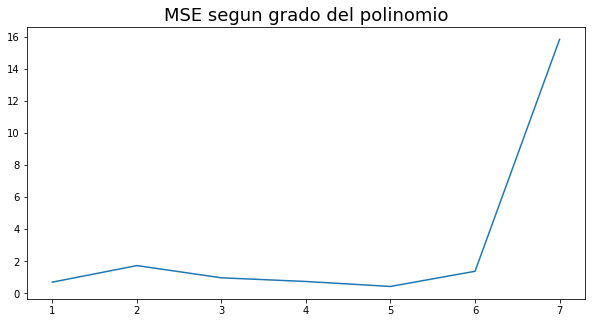

In [476]:
degree = []
mse_list = []
for i in range(1,8):
    degree.append(i)
    mse_list.append(k_folds(5, poly, i, data.dataset[:,0].reshape(1000,1), data.dataset[:,1].reshape(1000,1)))
 
fig = plt.figure(figsize=(10,5))
plt.title('MSE segun grado del polinomio', size=18)
plt.plot(degree,mse_list)